In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_parquet('./datasets/train.parquet')

In [3]:
df.columns

Index(['text', 'date', 'user', 'sentiment', 'query'], dtype='object')

In [13]:
df.isna().sum()

text         0
date         0
user         0
sentiment    0
query        0
dtype: int64

**Buscar registros que no vacios que es lo que filtra nuestra regex ^\s*$**

In [16]:
df.loc[df['text'].str.contains(r'^\s*$', na=False, regex=True), 'text']

Series([], Name: text, dtype: object)

In [14]:
df.describe()

,sentiment
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


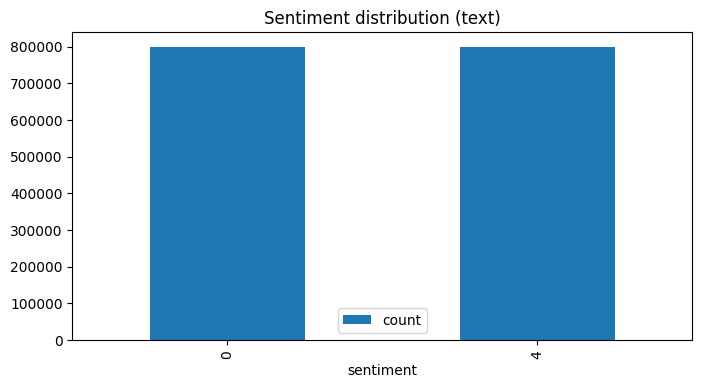

In [22]:
aux_df = pd.DataFrame(df['sentiment'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution (text)', figsize=(8, 4))

In [23]:
df["sentiment"] = df["sentiment"].replace({4: 1})

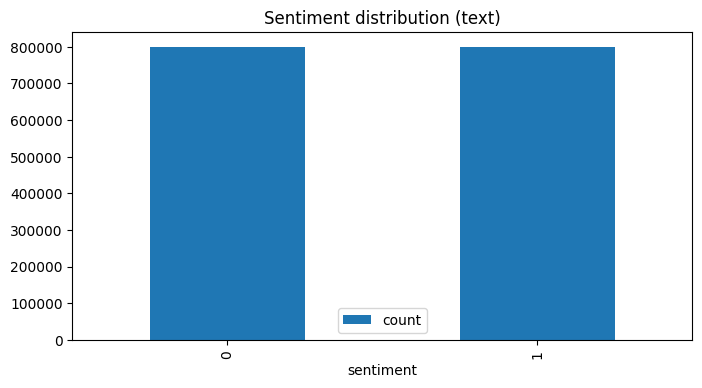

In [24]:
aux_df = pd.DataFrame(df['sentiment'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution (text)', figsize=(8, 4))

In [4]:
duplicados=df.duplicated()

In [3]:
df[df.duplicated(keep=False)]

,text,date,user,sentiment,query


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df[df.duplicated(keep=False)]

,text,date,user,sentiment,query


In [11]:
len(df)

1599812

In [12]:
df.to_parquet("./datasets/train.parquet", engine="pyarrow", index=False)